## Part 2: Analyze the most popular songs and artists throughout the year of 2017-2021 in the US - Kaixin



In [1]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the data and the study results
Top200songs_df_path = "Resources/Top200songs.csv"
Top200songs_df = pd.read_csv(Top200songs_df_path, encoding = "utf-8")
Top200songs_df.head(20)

# Converting dtypes using astype
Top200songs_df["Streams"]= Top200songs_df["Streams"].astype(int)
Top200songs_df["Track Name"]= Top200songs_df["Track Name"].astype(str)

# Create a new dataframe that only contains data of U.S.
Top200songs_US = Top200songs_df[Top200songs_df['name'] == "United States"]
Top200songs_US = Top200songs_US.reset_index(drop=True)
Top200songs_US.head(20)



,Track Name,Artist,Streams,URL,Date,name
0,Bad and Boujee (feat. Lil Uzi Vert),Migos,1293486,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017-01-04,United States
1,Fake Love,Drake,1179471,https://open.spotify.com/track/343YBumqHu19cGo...,2017-01-04,United States
2,Starboy,The Weeknd,1086272,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-04,United States
3,Closer,The Chainsmokers,856349,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-04,United States
4,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,803439,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-04,United States
5,Black Beatles,Rae Sremmurd,770885,https://open.spotify.com/track/6fujklziTHa8uoM...,2017-01-04,United States
6,Bad Things (with Camila Cabello),Machine Gun Kelly,726097,https://open.spotify.com/track/1PSBzsahR2AKwLJ...,2017-01-04,United States
7,Caroline,Aminé,709420,https://open.spotify.com/track/5hTpBe8h35rJ67e...,2017-01-04,United States
8,Bounce Back,Big Sean,704667,https://open.spotify.com/track/0SGkqnVQo9KPytS...,2017-01-04,United States
9,I Feel It Coming,The Weeknd,669820,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-04,United States


In [2]:
#Sort the table by most popular songs and export the resulting table to a new csv
Top200songs_US = Top200songs_US.sort_values(["Streams"], ascending = False)
Top200songs_US.to_csv("Resources/Top200songs_US.csv", index = False)

In [3]:
#Types of data
Top200songs_US.dtypes


Track Name    object
Artist        object
Streams        int64
URL           object
Date          object
name          object
dtype: object

## Part2-1 

We want to see the most popular songs throughout the year of 2017-2021

In [4]:
#Get rid of unuseful data.
Top200songs_US_df = Top200songs_US.drop(['Date','name','URL'],axis = 1)
Top200songs_US_df.head(20)

#Removed duplicate rows because there are many dupliceted track name.
Top200songs_US_groups = Top200songs_US_df.drop_duplicates(subset=['Track Name', 'Artist'], keep='first')

#The most-streamed songs (Top 10) from 01/2017-04/2021
Top200songs_US_groups2 = Top200songs_US_groups.drop(['Artist'],axis = 1)
Top10songs_US = Top200songs_US_groups2.iloc[0:10]
Top10songs_US = Top10songs_US.reset_index(drop=True)
Top10songs_US


,Track Name,Streams
0,Nonstop,5749019
1,drivers license,5723851
2,Survival,5219711
3,Emotionless,4842941
4,God's Plan,4739798
5,Elevate,4686139
6,Mona Lisa (feat. Kendrick Lamar),4444027
7,SAD!,4437612
8,STARGAZING,4244308
9,KOD,4233070


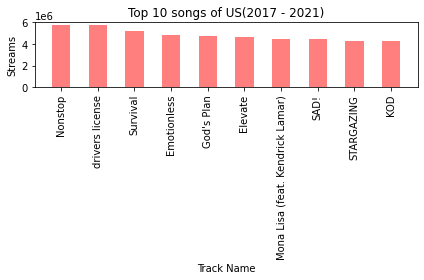

In [13]:
#Set the x_axis ,y_axis and tick locations
x_axis = Top10songs_US['Track Name']
y_axis = Top10songs_US['Streams']
tick_locations = [value for value in x_axis]

#Chart our data, give it a title, and label the axes
plt.bar(x_axis ,y_axis, facecolor = 'r', alpha = 0.5, align = "center", width = 0.5) 

#Give it a title, and label the axes
plt.title( "Top 10 songs of US(2017 - 2021)")
plt.ylabel("Streams")
plt.xlabel("Track Name")

plt.ylim(0, 6000000)
plt.xticks(tick_locations, Top10songs_US['Track Name'], rotation = 'vertical')

# Now we have bar chart of the most-streamed songs (Top 10) from 01/2017-04/2021
plt.tight_layout()
plt.savefig("Images/most-streamed songs.png")
plt.show()


## Part2-2 

We want to see the most popular songs and artists throughout the year of 2017-2021



In [5]:
#The most popular artists (Top 10) from 01/2017-04/2021
Top200artists_groups = Top200songs_US_groups.drop(['Track Name','Streams'],axis = 1)
Top200artists_groups = Top200artists_groups.reset_index(drop=True)
Top200artists_counts = pd.value_counts(Top200artists_groups["Artist"])
Top10artists = Top200artists_counts.iloc[0:10]
Top10artists


Taylor Swift     103
Future            92
Drake             88
Trippie Redd      74
Eminem            67
Juice WRLD        66
Lil Uzi Vert      64
Logic             63
XXXTENTACION      61
Ariana Grande     57
Name: Artist, dtype: int64

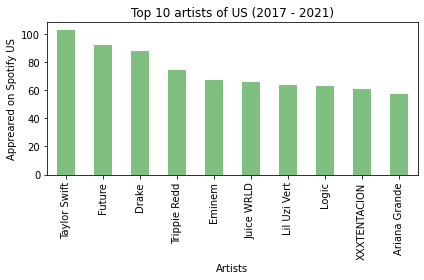

In [6]:
#Chart our data, give it a title, and label the axes
Top10artists.plot(kind = "bar", facecolor = 'green', alpha = 0.5, align = "center", width = 0.5) 

#Give it a title, and label the axes
plt.title( "Top 10 artists of US (2017 - 2021)")
plt.ylabel("Appreared on Spotify US")
plt.xlabel("Artists")

# Now we have bar chart of the most-streamed songs (Top 10) from 01/2017-04/2021
plt.tight_layout()
plt.savefig("Images/most popular artists.png")
plt.show()

